<a href="https://colab.research.google.com/github/larissa-eleterio/datasets/blob/master/MIBR_CSSUMMIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando desempenho MIBR no campeonato CS Summit 6

<center><img alt="Rio de Janeiro" width="60%" src="https://www.teamplay.com.br/imagens/noticias/14588_871px.jpg?v=1591723974"></center>

Durante a quarentena eu adquiri um novo hobby: assistir campeonatos de CS:GO!


Acompanhei dois campeonatos: Blast Premier Spring 2020 e CS Summit 6, me descobri fã do time brasileiro mais antigo de CS:Go: MIBR. 

O MIBR fez uma temporada excelente durante o campeonato da Blast Premier, porém, durante o CS Summit o MIBR teve um desempenho muito aquém do que havia demonstrado anteriormente, e foi justamente isso que me motivou a analisar o desempenho do time nesse campeonato.

Mas antes de começar as análises, vou deixar aqui uma breve descrição sobre a dinâmica do jogo pra quem não conhece.

Counter-Strike: Global Offensive (CS:GO) é um jogo online desenvolvido pela Valve Corporation e pela Hidden Path Entertainment. Esse jogo de equipes consiste em dois times composto por 5 pessoas cada: terroristas e contra-terroristas. 

O objetivo do time terrorista é plantar uma bomba em um ponto específico do mapa, os contra-terroristas tem então a missão de impedir que a bomba seja plantada.

Os terroristas tem 1 minuto e 30 segundos para atingir seu objetivo, caso não consiga os contra-terroristas vencem, uma vez que conseguiram seu objetivo de proteger o território.

Além disso é importante falar sobre os territórios, eles são chamados de mapas. Em um campeonato competitivo existem 9 mapas disponíveis para seleção, são eles: Cache, Cobblestone, Dust 2, Inferno, Mirage, Nuke, Overpass, Train e Vertigo. O desempenho de cada time pode variar dependendo do mapa.

### Sobre os dados

As estatísticas de todos os times que participam de campeonatos profissionais estão disponíveis no site da [hltv](https://www.hltv.org/matches).

Eu utilizei o selenium para obter os dados, mas é preciso cuidado e ler com atenção ao robots.txt do site para fazer o web scraping das informações, pois nem todas são permitidas serem extraídas.


#### Importando os dados

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/larissa-eleterio/datasets/master/mibr_cssummit.csv',sep=';')

#### Análise Inicial dos Dados


In [ ]:
# Verificando dimensões do tamanho do DataFrame
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  8
Entradas:  140


In [2]:
# Descrevendo as colunas
df.columns

Index(['Player', 'Championship', 'Balance', 'ADR', 'Kast', 'Rating', 'Map',
       'Side'],
      dtype='object')

O nosso dataframe possui 8 colunas:

* Player: lista o nome dos jogadores do MIBR

* Championship: identifica o campeonato em que o jogo aconteceu

* Balance: É a diferença entre o número de vezes que matou e o número de vezes que morreu. Se positivo, o jogador matou mais do que morre, se negativo, o jogador morreu mais do que efetuou abates.

* ADR (Average damage per round): Média de dano que o jogador causou a outros durante a partida. Essa medida varia entre 0 e 100.

* Kast (Kill Assist Survived round and Traded deaths): percentual de rounds onde um jogador fez uma eliminação, assistência ou trocas de eliminações, ou seja quando ele mata o adversário mas acaba morrendo durante esse mesmo ataque. 

* Rating: Medida de performance do jogador. Essa medida varia de 0 a 3, boas performances têm Rating maiores que 1, performances ruins têm Rating abaixo de 1 e performances estelares, mesmo que raras, têm Rating acima de 2.00.

* Map: Qual dos 9 mapas disponpíveis foi jogado

* Side: Define se o time jogou naquele round como terrorista ou contra-terrorista

In [10]:
# Vejamos os tipos das variáveis
df.dtypes

Player           object
Championship     object
Balance           int64
ADR             float64
Kast            float64
Rating          float64
Map              object
Side             object
dtype: object

As variáveis que se referem ao nome do jogador, qual campeonato jogou, qual mapa e em qual side são todas do tipo object (objeto, nome), enquando as variáveis que medem efetivamente o desempenho dos atletas são do tipo inteiro ou float (decimal). Exceto uma: Kast ela está como object, vamos corrigir ela:



In [ ]:
#Vamos criar uma função que remove o símbolo de percentual e transforma o número em float
def corrige(x):
    return float(x.strip('%'))/100

df["Kast"]=df.apply(lambda x: corrige(x["Kast"]),axis=1)

In [11]:
# Vamos olhar como ficou nossa transformação
df.head()

,Player,Championship,Balance,ADR,Kast,Rating,Map,Side
0,Epitacio 'TACO' de Melo,CS Summit 6 North America,2,96.8,0.889,1.57,Vertigo,Terrorist
1,Fernando 'fer' Alvarenga,CS Summit 6 North America,3,90.0,0.778,1.45,Vertigo,Terrorist
2,Gabriel 'FalleN' Toledo,CS Summit 6 North America,-4,32.4,0.556,0.67,Vertigo,Terrorist
3,Alencar 'trk' Rossato,CS Summit 6 North America,-3,39.3,0.778,0.64,Vertigo,Terrorist
4,Vito 'kNgV-' Giuseppe,CS Summit 6 North America,-5,36.8,0.444,0.53,Vertigo,Terrorist


### Verificando existência de valores ausentes

In [12]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

Side            0.0
Map             0.0
Rating          0.0
Kast            0.0
ADR             0.0
Balance         0.0
Championship    0.0
Player          0.0
dtype: float64

Os dados da hltv são de boa qualidade de preenchimento e não apresentaram nesse campeonato nenhum valor ausente.

### Analisando o desempenho dos jogadores do MIBR 

Como em um jogo de futebol, no CS:GO os jogadores podem (mas não necessariamente) ter funções específicas dentro do time. Alguns são responsáveis por sempre ir primeiro e abrir caminhos para os outros e consequentemente esses tem muito mais chances de ser abatido pelos adversários do que os outros.
Outros jogadores podem ficar por último por levarem consigo a bomba a ser plantada.

Vamos analisar então o desempenho dos jogadores do Mibr durante o campeonato CS Summit 6.

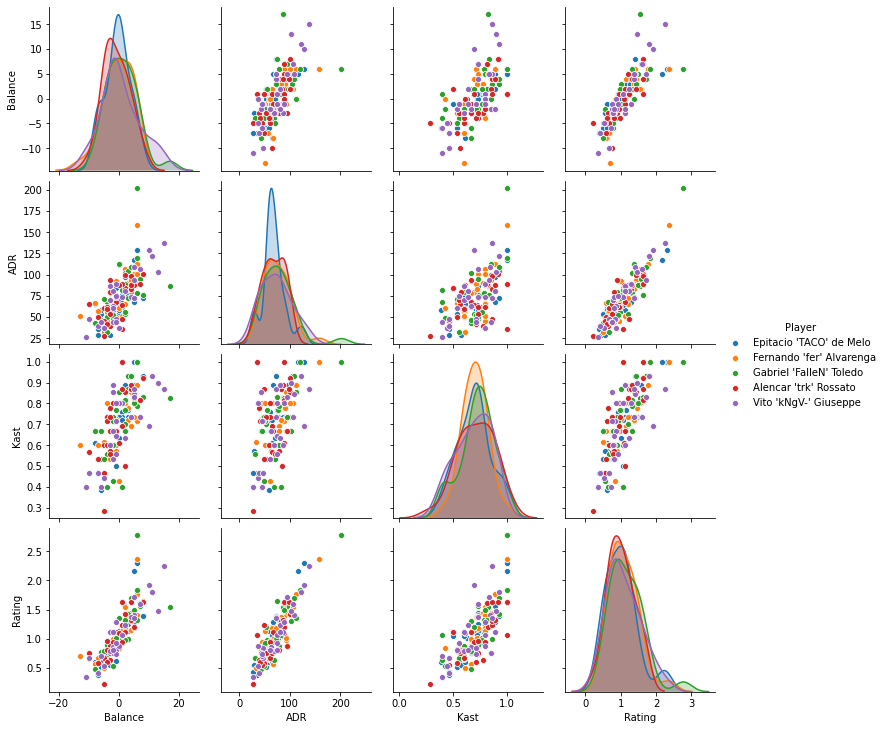

In [17]:
sns.pairplot(data=df, hue="Player");

No gráfico acima é possível perceber temos na diagonal o desempenho dos jogadores em cada uma das métricas.

* Na variável *Balance*, que representa o saldo entre número de vezes que matou e número de vezes que morreu. Os jogadores TACO e TRK se destacam entre os outros como sendo aqueles que mais abateram inimigos no jogo do que morreram. 

* Na variável ADR (média de dano por partida) novamente o TACO se destaca muito entre os outros jogadores e tem uma média de dano muito superior aos demais nesse campeonato.

* Quando analisamos o Kast dos jogadores, que avalia o quando os jogadores fazem assistências, isto é, quando causam dano no adversário e logo em seguida alguém do seu time abate o adversário, o FER se destaca com maior taxa de Kast no time.

* Quando analisamos o Rating dos jogadores, que leva em consideração: eliminações feitas em um round, rounds sobrevividos e um valor baseado no número de rounds onde o jogador fez mais de uma eliminação, o time tem um desempenho similar entre si, com um destaque pro TACO e para o Fallen que tem ratings assima de 2 em algumas partidas (observe a cauda da distribuição).

Além disso, esse gráfico permite compreender se há alguma associação entre as variáveis que medem o desempenho dos jogadores.

* O rating dos jogadores parece ter uma relação positiva e forte com o Balance e a ADR. Essa associação faz sentido uma vez que o rating leva em consideração no seu cálculo, o número de mortes executadas e a sobrevivência durante o jogo.





### Analisando o desempenho do MIBR por Mapa 

É muito comum no CS:GO os times terem melhor desempenho em um mapa do que em outro, e também em um side. Isso é, um time pode jogar bem em um mapa como Terrorista, porém não tão bem como Contra-Terrorista nesse mesmo mapa. V
amos verificar se isso é verdade dentro do Mibr.

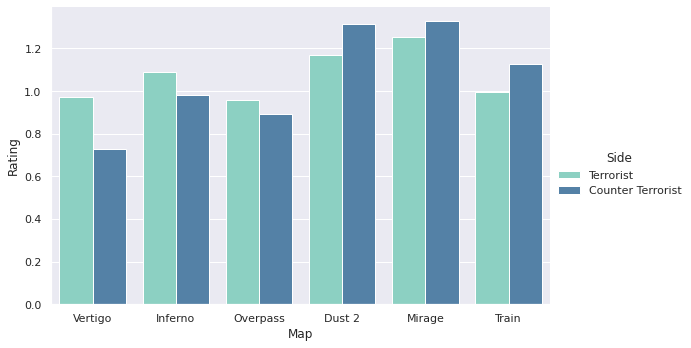

In [66]:
g = sns.catplot(x="Map", y="Rating", hue="Side", data=df,
                kind="bar", ci=None, aspect=1.6, palette=["#81DBC8", "steelblue"])

* Nos mapas Vertigo, Inferno e Overpass o Mibr tem um desempenho melhor como Terrorista do que como Contra-terrorista.

* Nos Mapas Dust 2, Mirage e Train o time se sai ligeiramente melhor como Contra-Terrorista.

* Além disso, nos mapas Dust2 e Mirage o Mibr tem melhor desempenho em relação aos demais.

Conhecer o desempenho do time no mapa e no side, dá a ele a capacidade de tomar a melhor decisão na hora de escolher o mapa que será jogado. 

Isso porque antes da partida, cada time pode escolher dois mapas e banir dois mapas da partida. 
Quando time escolhe um mapa não pode escolher o side em que irá jogar.

Saber seu desempenho em cada mapa, pode ajudar os jogadores a escolherem o mapa em que estão com maior desempenho e nos mapas que não puderem escolher, tomarem a melhor decisão sobre qual side eles devem iniciar a partida.

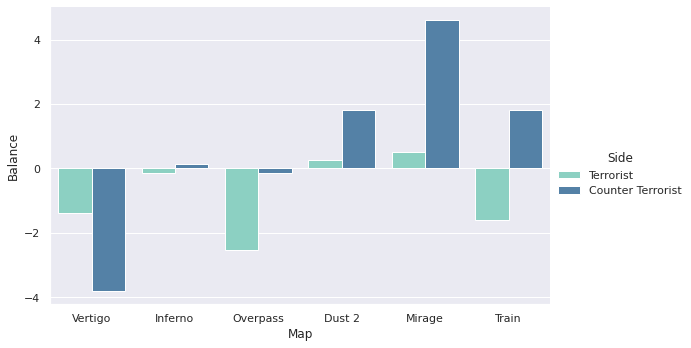

In [67]:
g = sns.catplot(x="Map", y="Balance", hue="Side", data=df,
                kind="bar", ci=None, aspect=1.6, palette=["#81DBC8", "steelblue"])

A variável Balance nos dá a dimensão de onde o Mibr precisa melhorar. Nos mapas Vertigo, Overpass e Train, o Balance do time ficou no negativo, indicando que ele mais morreu do que matou durante as partidas.

É esse o nosso objetivo com essa análise identificar onde o Mibr precisa trabalhar mais para não repetir os resultados do CS Summit. E esse gráfico indica precisamente quais mapas o Mibr precisa treinar mais e quais sides ele tem mais perdas.

### Conclusão

Os jogadores do Mibr individualmente tiveram um bom desempenho durante o CS Summit. Vimos como o jogador TACO se destacou no seu desempenho superior em Balance e ADR, isso é o saldo de mortes dele é positivo e superior aos demais, além de ele causar muito dano ao adversário.

Além disso o TACO junto com o jogador Fallen teve alguns resultados de ratings excelentes durante o campeonato, ou seja, seus desempenhos foram muito bem avaliados em jogo e acima da média.

Além disso, foi possível compreender os pontos fortes e os que ainda precisam ser trabalhados pela equipe como aprimorar os treinos nos mapas Vertigo, Overpass e Train.

